In [1]:
!pip install pmdarima

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

ARIMA(8:2)

In [3]:
data = pd.read_csv('QuangNinh.csv')

# Chuyển đổi cột 'date' thành định dạng thời gian
data['date'] = pd.to_datetime(data['date'])
data = data.loc[(data['date'] >= '2019-01-03') & (data['date'] <= '2024-01-03')]
data['date'] = data['date'].dt.strftime('%d-%m-%Y')
data

,Unnamed: 0,date,pm25,pm10,o3,no2,so2,co,AQI
0,1,14-02-2021,20,6,28,5,12,5,20
1,2,15-02-2021,9,14,28,9,12,5,14
2,3,16-02-2021,18,17,26,9,12,6,18
3,4,17-02-2021,20,24,26,15,12,6,24
4,5,18-02-2021,28,29,38,16,12,6,29
...,...,...,...,...,...,...,...,...,...
852,853,23-12-2023,18,12,18,10,7,3,18
853,854,24-12-2023,13,31,18,15,7,4,31
854,855,01-01-2024,20,27,16,16,8,4,27
855,856,02-01-2024,31,13,10,15,8,4,31


In [4]:
train_size = int(0.8*len(data))
test_size = len(data)-train_size
train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]

# Qua trinh training
x_train = np.array(train_data.index).reshape(-1,1)
y_train = np.array(train_data['AQI'])
#tim ra mo hinh ARIMA tot nhat
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5270.465, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5346.955, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5348.928, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5348.916, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5344.956, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5268.822, Time=0.32 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5318.818, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5270.384, Time=0.39 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=5288.701, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5268.536, Time=0.26 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5332.157, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5270.435, Time=0.38 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=5317.766, Time=0.14 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : 

ARIMA(order=(2, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [5]:
# Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['AQI'])
y_pred = model.predict(n_periods=len(y_test))

In [6]:
# Quá trình tạo index predict 30 ngày tiếp theo
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[11.24606276 12.94363949 14.17197121 14.93185847 15.37309734 15.62175514
 15.75977812 15.83578536 15.87746476 15.90026818 15.91272891 15.91953343
 15.92324788 15.92527512 15.92638141 15.9269851  15.92731451 15.92749425
 15.92759233 15.92764584 15.92767504 15.92769097 15.92769967 15.92770441
 15.927707   15.92770841 15.92770918 15.9277096  15.92770983 15.92770996]


In [7]:
# Tính RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Tính MAE
mae = mean_absolute_error(y_test, y_pred)

# Tính MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

RMSE: 48.01158632949042
MAE: 17.891701855969206
MAPE: 42.393996530082404


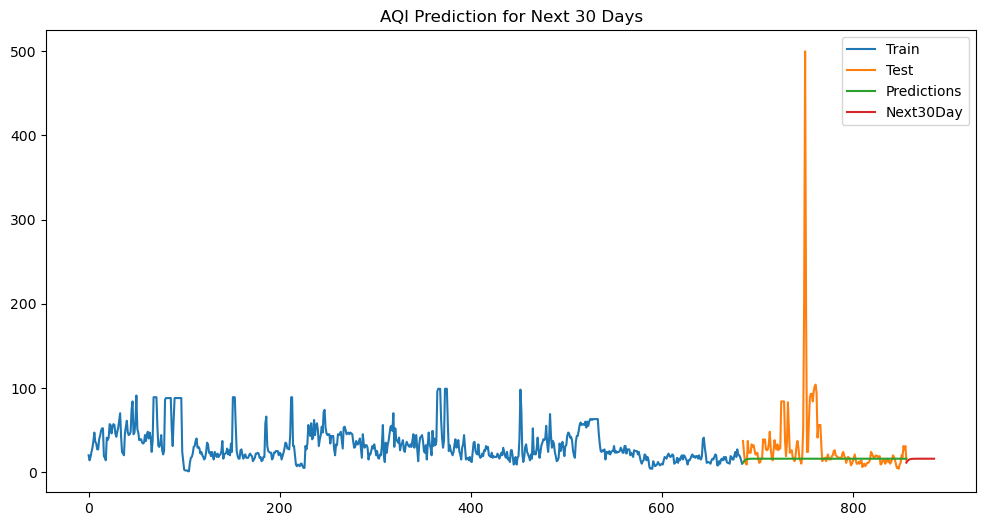

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.title('AQI Prediction for Next 30 Days')
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

ARIMA(7:3)

In [9]:
train_size = int(0.7*len(data))
test_size = len(data)-train_size
train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]

# Qua trinh training
x_train = np.array(train_data.index).reshape(-1,1)
y_train = np.array(train_data['AQI'])
#tim ra mo hinh ARIMA tot nhat
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4678.939, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4744.184, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4746.159, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4746.147, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4742.186, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4677.268, Time=0.27 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4719.946, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4678.875, Time=0.33 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=4694.210, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4676.998, Time=0.24 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4731.593, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4678.915, Time=0.33 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=4719.324, Time=0.15 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : 

ARIMA(order=(2, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [10]:
# Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['AQI'])
y_pred = model.predict(n_periods=len(y_test))
# Quá trình tạo index predict 30 ngày tiếp theo
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[ 9.6927945  11.44242102 12.63857423 13.35989291 13.771901   14.00103262
 14.12669242 14.19508882 14.23216316 14.25221338 14.26304295 14.26888808
 14.27204167 14.27374272 14.27466017 14.27515494 14.27542177 14.27556565
 14.27564325 14.27568509 14.27570765 14.27571982 14.27572638 14.27572992
 14.27573183 14.27573286 14.27573341 14.27573371 14.27573387 14.27573396]


In [11]:
# Tính RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Tính MAE
mae = mean_absolute_error(y_test, y_pred)

# Tính MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

RMSE: 39.77792884482059
MAE: 13.737537924450246
MAPE: 36.074461357166214


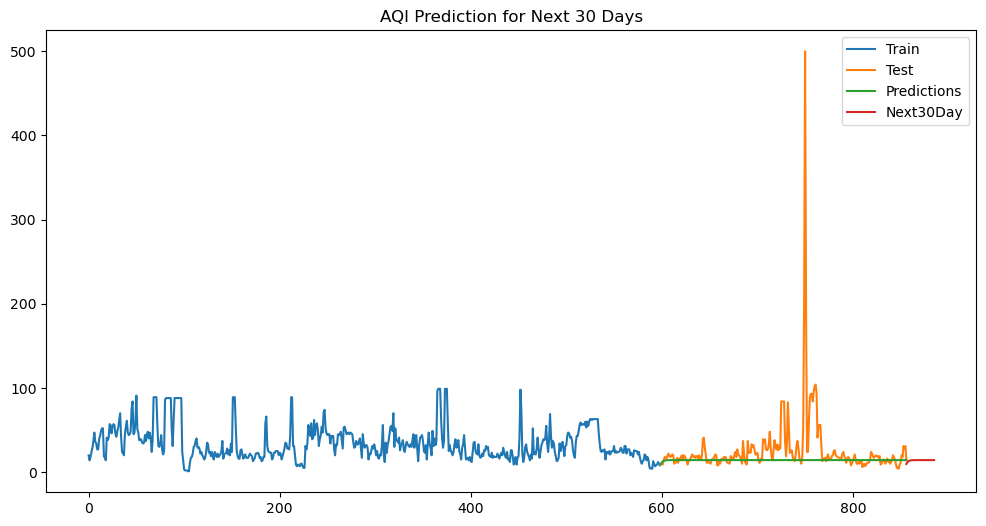

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.title('AQI Prediction for Next 30 Days')
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

ARIMA(9:1)

In [13]:
train_size = int(0.9*len(data))
test_size = len(data)-train_size
train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]

# Qua trinh training
x_train = np.array(train_data.index).reshape(-1,1)
y_train = np.array(train_data['AQI'])
#tim ra mo hinh ARIMA tot nhat
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=6732.871, Time=0.91 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=7312.744, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=6796.750, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=6862.375, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=8003.980, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=6749.455, Time=0.37 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=6749.735, Time=0.43 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=6729.527, Time=0.77 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=6728.079, Time=0.80 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=6742.187, Time=0.20 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=6729.619, Time=1.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=6759.830, Time=0.14 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=6739.428, Time=0.24 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.14 sec
 ARIMA(3,0,1)(0,0,0)[0]             : 

ARIMA(order=(3, 0, 1), scoring_args={}, suppress_warnings=True)

In [14]:
# Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['AQI'])
y_pred = model.predict(n_periods=len(y_test))
# Quá trình tạo index predict 30 ngày tiếp theo
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[27.53138227 35.35411388 36.84927667 35.26616885 33.6793949  33.10759933
 33.22861928 33.48695755 33.61101879 33.59935298 33.54055412 33.49529412
 33.4755333  33.46932038 33.46452383 33.45678731 33.44710665 33.43755537
 33.42917652 33.42195967 33.4155207  33.40957177 33.40401625 33.39885803
 33.39410827 33.38975179 33.3857548  33.38208114 33.37870063 33.37558931]


In [15]:
# Tính RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Tính MAE
mae = mean_absolute_error(y_test, y_pred)

# Tính MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

RMSE: 18.80014298069721
MAE: 17.996808373451973
MAPE: 151.93678887873628


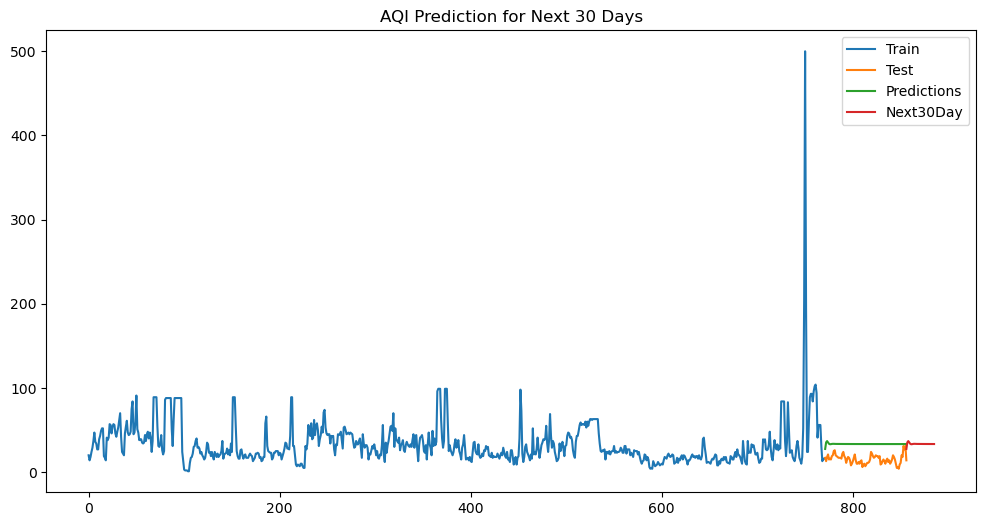

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.title('AQI Prediction for Next 30 Days')
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()